In [2]:
import json
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [3]:
songs = pd.read_csv('spotify_songs.csv')
songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [7]:
for data in [songs]:
    print('number of songs submitted:', len(data))


number of songs submitted: 32833


In [24]:
def filter_instrumentalness(pair, threshold):
    title, instrumentalness = pair
    return instrumentalness > threshold 

songs_instrumentalness = dict(zip(songs['track_name'], songs['instrumentalness']))
filtered_songs = dict(filter(lambda x: filter_instrumentalness(x, 0.5), songs_instrumentalness.items()))
filtered_songs

{'Heaven Can Wait - The Aston Shuffle Remix': 0.746,
 'Stay': 0.523,
 'With You - LöKii Remix': 0.676,
 'Dreams Of You (feat. Rae Morris)': 0.523,
 'Insane': 0.505,
 'Roots': 0.688,
 'Feel Good': 0.754,
 'Penny': 0.922,
 'Shades Of Voices (Original Mix)': 0.633,
 'Spirit Of Freedom': 0.623,
 "Callin' - Extended Mix": 0.588,
 'Pure Gold': 0.557,
 'Dumb': 0.605,
 'Sunshine': 0.528,
 'Bromance - Avicii Remix': 0.753,
 'Mr Todd Terry': 0.738,
 'No New Friends - Dombresky Remix': 0.812,
 'Faded': 0.797,
 'Baianá': 0.672,
 'Amsterdam': 0.709,
 'Perspective': 0.67,
 'everything i wanted': 0.657,
 'Sandstorm - Radio Edit': 0.987,
 'We like to Party! (Six Flags)': 0.859,
 'The Rhythm Of The Night': 0.739,
 'Will I Ever': 0.794,
 'Back in My Life': 0.822,
 'More And More - Single Version': 0.835,
 'Better Off Alone - Hitradio Mix': 0.8,
 'Ecuador - Original Radio Edit': 0.699,
 'Kernkraft 400': 0.901,
 'God Is a DJ': 0.885,
 'The Launch - Radio Edit': 0.922,
 'Mirage': 0.86,
 'Tick': 0.807,
 'Li

In [30]:
def filter_top(pair, count):
    key, value = pair
    return value > count


top_songs = dict((songs['track_name'] + ' - ' + songs['track_artist']).value_counts())
top_songs = dict((filter(lambda x: filter_top(x, 1), top_songs.items())))

top_songs

{'Señorita - Shawn Mendes': 13,
 'One Dance - Drake': 12,
 'Dance Monkey - Tones and I': 12,
 "I Don't Care (with Justin Bieber) - Ed Sheeran": 12,
 'Sunflower - Spider-Man: Into the Spider-Verse - Post Malone': 11,
 'Sweet Home Alabama - Lynyrd Skynyrd': 11,
 'ROXANNE - Arizona Zervas': 11,
 "Livin' On A Prayer - Bon Jovi": 11,
 'Closer (feat. Halsey) - The Chainsmokers': 10,
 'Lose You To Love Me - Selena Gomez': 10,
 'Circles - Post Malone': 10,
 'Panini - Lil Nas X': 10,
 'I Took A Pill In Ibiza - Seeb Remix - Mike Posner': 10,
 "Sweet Child O' Mine - Guns N' Roses": 10,
 "Welcome To The Jungle - Guns N' Roses": 10,
 'Eye of the Tiger - Survivor': 10,
 'Cheap Thrills - Sia': 9,
 'Rare - Selena Gomez': 9,
 'Adore You - Harry Styles': 9,
 'Happy Now - Kygo': 9,
 'Beautiful People (feat. Khalid) - Ed Sheeran': 9,
 'Liar - Camila Cabello': 9,
 'HIGHEST IN THE ROOM - Travis Scott': 9,
 "Paradise City - Guns N' Roses": 9,
 'Ride It - Regard': 8,
 'HIGHEST IN THE ROOM (feat. ROSALÍA & Lil

In [31]:
top_artists = dict(songs['track_artist'].value_counts())

top_artists = dict((filter(lambda x: filter_top(x, 10), top_artists.items())))
top_artists

{'Martin Garrix': 161,
 'Queen': 136,
 'The Chainsmokers': 123,
 'David Guetta': 110,
 'Don Omar': 102,
 'Drake': 100,
 'Dimitri Vegas & Like Mike': 93,
 'Calvin Harris': 91,
 'Hardwell': 84,
 'Kygo': 83,
 "Guns N' Roses": 79,
 'The Weeknd': 76,
 'Avicii': 74,
 'J Balvin': 72,
 'Maroon 5': 71,
 'Ed Sheeran': 69,
 'Major Lazer': 67,
 'Logic': 66,
 'Daddy Yankee': 66,
 'Tiësto': 66,
 '2Pac': 65,
 'DJ Snake': 62,
 'Wisin & Yandel': 61,
 'Bad Bunny': 61,
 'Post Malone': 59,
 'Rihanna': 57,
 'Khalid': 57,
 '50 Cent': 57,
 'Ozuna': 56,
 'Zedd': 55,
 'R3HAB': 55,
 'Ariana Grande': 55,
 'Selena Gomez': 52,
 'Rick Ross': 51,
 'Eminem': 51,
 'Nicky Jam': 50,
 'The Notorious B.I.G.': 50,
 'Shawn Mendes': 49,
 'Armin van Buuren': 49,
 'オメガトライブ': 49,
 'Marshmello': 48,
 'Coldplay': 48,
 'Steve Aoki': 47,
 'Katy Perry': 47,
 'Tyga': 47,
 'Future': 47,
 'The Game': 47,
 'Alan Walker': 47,
 'Scorpions': 46,
 'Sam Feldt': 46,
 'Van Halen': 45,
 'The Cranberries': 45,
 'Bobby Brown': 44,
 'Young Thug': 

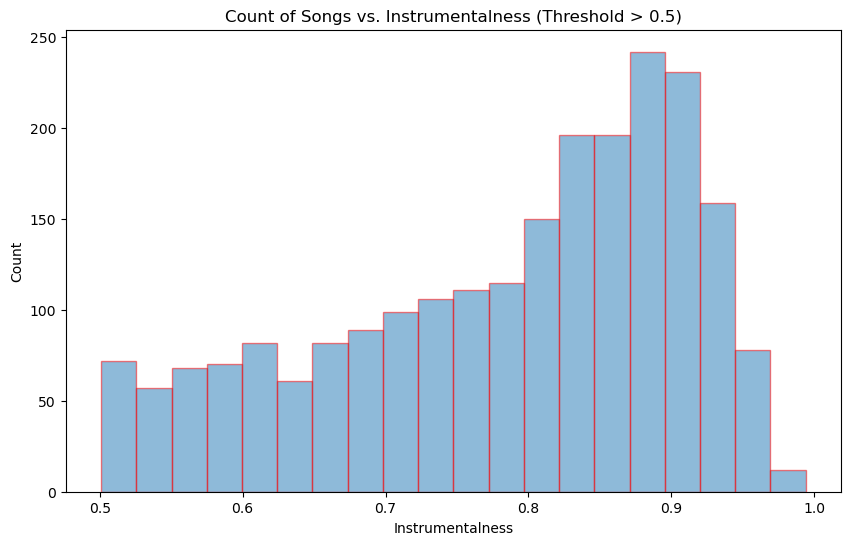

In [32]:
instrumentalness_values = list(filtered_songs.values())
coutn = len(instrumentalness_values)

plt.figure(figsize=(10,6))

plt.hist(instrumentalness_values, bins =20, edgecolor = 'red', alpha = 0.5)

plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.title(f'Count of Songs vs. Instrumentalness (Threshold > 0.5)')

plt.show()


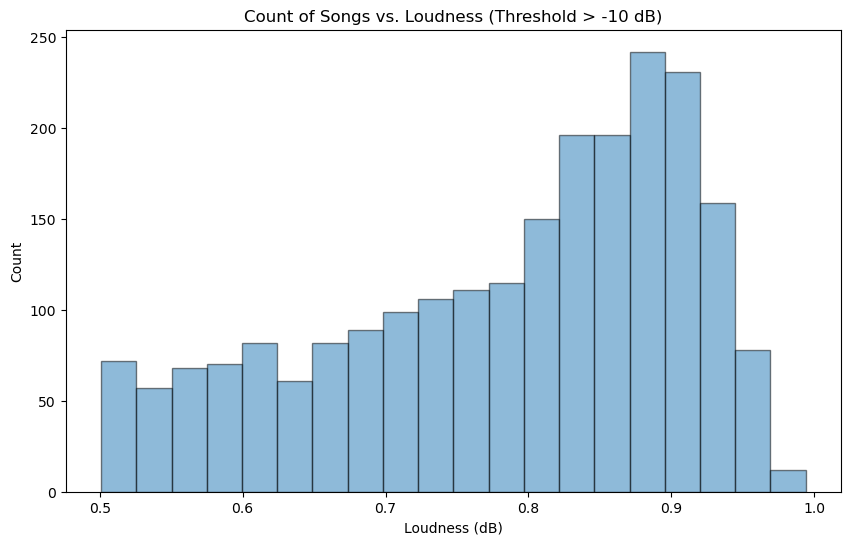

In [33]:
loudness_values = list(filtered_songs.values())
count = len(loudness_values)

plt.figure(figsize=(10, 6))  # Set the figure size

plt.hist(loudness_values, bins=20, edgecolor='black', alpha=0.5)

plt.xlabel('Loudness (dB)')
plt.ylabel('Count')
plt.title(f'Count of Songs vs. Loudness (Threshold > -10 dB)')

plt.show()